<a href="https://colab.research.google.com/github/anubhavtm/My-Visual-Studio-Files/blob/master/Behavioural_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/anubhavtm/Track.git

fatal: destination path 'Track' already exists and is not an empty directory.


In [2]:
!ls Track

driving_log.csv  IMG


In [3]:
!pip3 install imgaug

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten,Dropout,Convolution2D,MaxPool2D
import cv2
import pandas as pd
import random
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa

Using TensorFlow backend.


In [5]:
datadir = 'Track'
columns = ['center','left','right','steering','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth',-1)
data.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  ...     speed
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg  ...  0.649786
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg  ...  0.627942
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg  ...  0.622910
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg  ...  0.619162
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg  ...  0.615438

[5 rows x 7 columns]

In [6]:
def path_leaf(path):
  head,tail = ntpath.split(path)
  return tail
  
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()

center  ...     speed
0  center_2018_07_16_17_11_43_382.jpg  ...  0.649786
1  center_2018_07_16_17_11_43_670.jpg  ...  0.627942
2  center_2018_07_16_17_11_43_724.jpg  ...  0.622910
3  center_2018_07_16_17_11_43_792.jpg  ...  0.619162
4  center_2018_07_16_17_11_43_860.jpg  ...  0.615438

[5 rows x 7 columns]

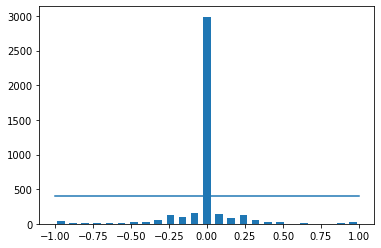

In [7]:
samples_per_bin = 400
num_bins=25
hist,bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1] + bins[1:]) *0.5
plt.bar(center,hist,width =0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))


total data: 4053
removed 2590
remaining 1463


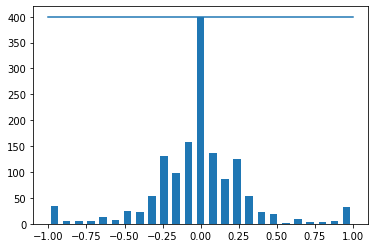

In [8]:
print('total data:',len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if (data['steering'][i] >=bins[j]) and (data['steering'][i] <=bins[j+1]):
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed',len(remove_list))      
data.drop(data.index[remove_list],inplace=True)
print('remaining',len(data))


hist,_ = np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width =0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

In [9]:
print(data.iloc[1])
def load_img_steering(datadir,df):
  image_path =[]
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center,left,right = indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))

    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths,steering
# print(type(data))
image_paths,steerings = load_img_steering(datadir +'/IMG',data)   
print(type(image_paths)) 

center      center_2018_07_16_17_11_44_413.jpg
left        left_2018_07_16_17_11_44_413.jpg  
right       right_2018_07_16_17_11_44_413.jpg 
steering   -0.05                              
throttle    0.642727                          
reverse     0                                 
speed       1.43401                           
Name: 12, dtype: object
<class 'numpy.ndarray'>


In [10]:
X_train,  X_valid,  y_train,  y_val = train_test_split(image_paths,steerings,test_size =0.2,random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train),len(X_valid)))

Training Samples: 3511
Valid Samples: 878


Text(0.5, 1.0, 'Validation set')

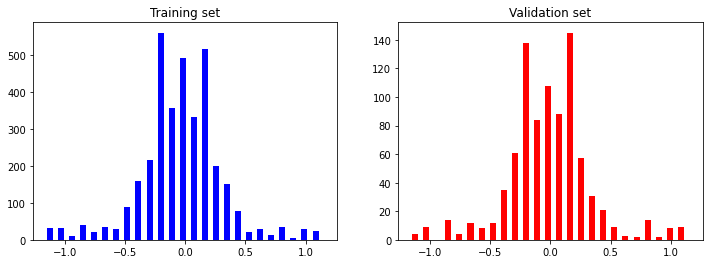

In [11]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins = num_bins,width =0.05,color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_val,bins = num_bins,width =0.05,color='red')
axes[1].set_title('Validation set')

In [0]:
def zoom(img):
  zoom=iaa.Affine(scale=(1,1.3))
  img = zoom.augment_image(img)
  return img

Text(0.5, 1.0, 'Zoomed Image')

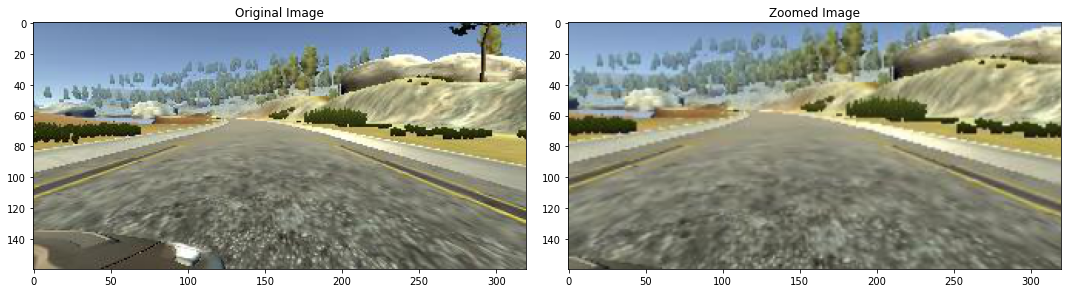

In [13]:
image = image_paths[np.random.randint(0,1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')


axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [0]:
def pan(img):
  pan = iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
  img = pan.augment_image(img)
  return img

Text(0.5, 1.0, 'Pannnes Image')

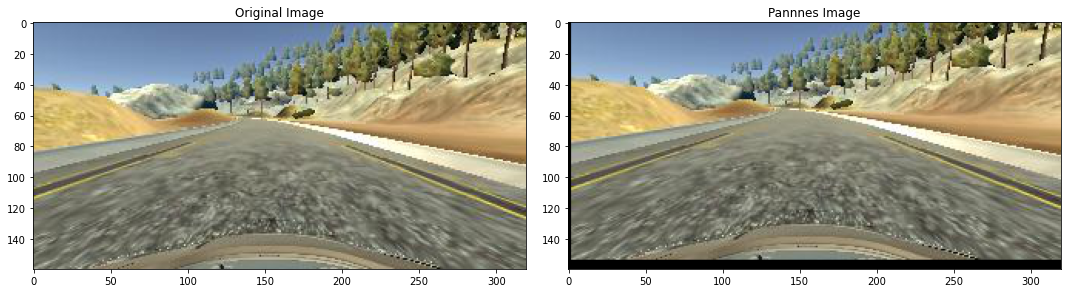

In [15]:
image = image_paths[np.random.randint(0,1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')


axs[1].imshow(panned_image)
axs[1].set_title('Pannnes Image')

In [0]:
def image_random_brightness(img):
  mul = iaa.Multiply(mul=(0.2,1.2))
  img = mul.augment_image(img)
  return img

Text(0.5, 1.0, 'brightness_altered  Image')

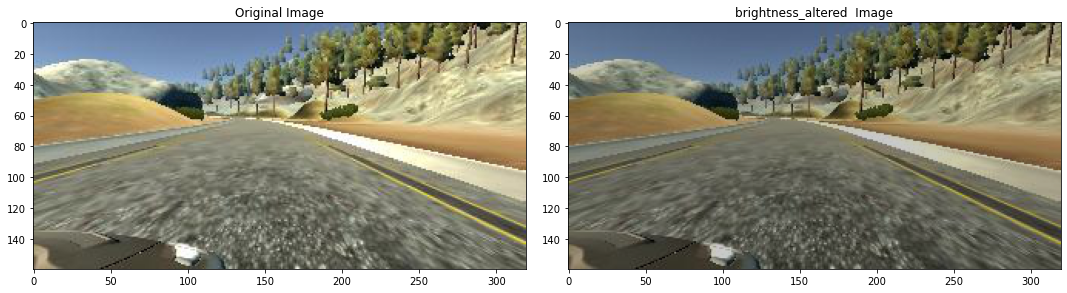

In [17]:
image = image_paths[np.random.randint(0,1000)]
original_image = mpimg.imread(image)
brightness_alter_image = image_random_brightness(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')


axs[1].imshow(brightness_alter_image)
axs[1].set_title('brightness_altered  Image')

In [0]:
def img_random_flip(img,steering_angle):
  img = cv2.flip(img,1)
  steering_angle = steering_angle *(-1)
  return img,steering_angle

Text(0.5, 1.0, 'Flip Image steering angle :-0.47053290000000003')

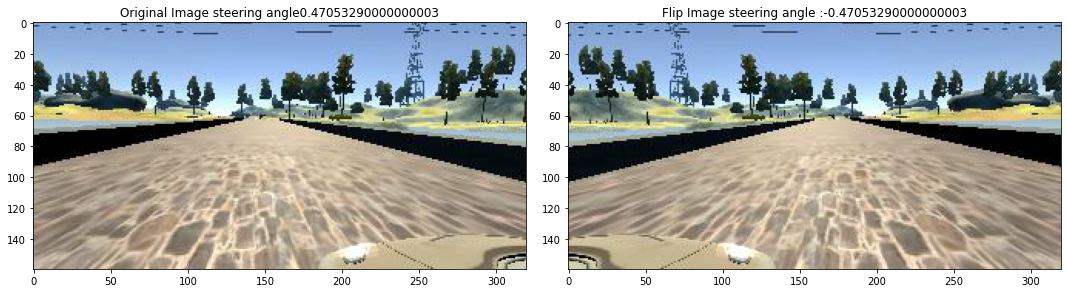

In [19]:
random_path = random.randint(0,1000)
image = image_paths[random_path]
steering_angle = steerings[random_path]

original_image = mpimg.imread(image)
flip_image,flipped_steering = img_random_flip(original_image,steering_angle)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image '+'steering angle' + str(steering_angle))


axs[1].imshow(flip_image)
axs[1].set_title('Flip Image '+'steering angle :' + str(flipped_steering))

In [0]:
def random_augment(img,steering_angle):
  img = mpimg.imread(img)
  if np.random.rand() < 0.5:
    img = pan(img)
  if np.random.rand() < 0.5:
    img = zoom(img)
  if np.random.rand() < 0.5:
    img = image_random_brightness(img)    
  if np.random.rand() < 0.5:
    img,steering_angle = img_random_flip(img,steering_angle)  
  return img,steering_angle

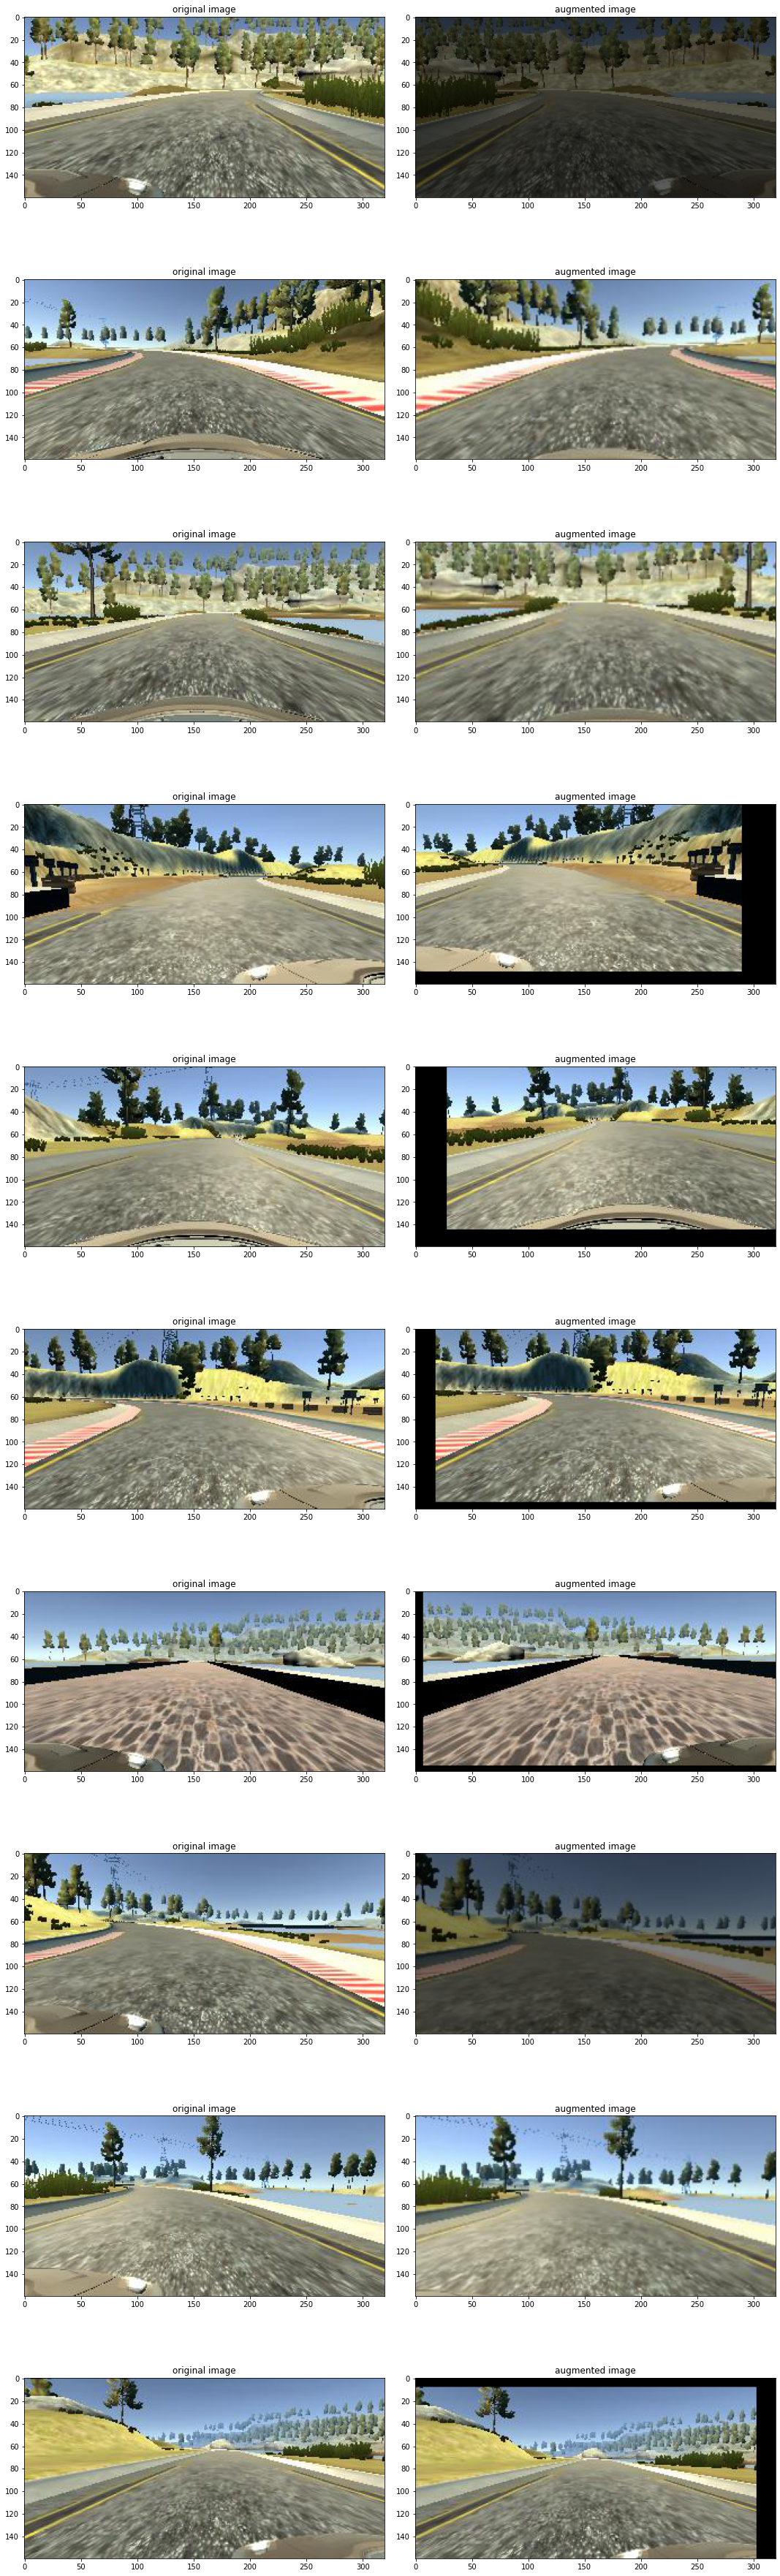

In [21]:
ncol=2
nrow=10

fig,axs = plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0,len(image_paths)-1)
  random_image = image_paths[randnum]
  random_steering= steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image,steering = random_augment(random_image,random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("original image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("augmented image")


In [0]:
def img_preprocess(img):
  
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img =cv2.resize(img,(200,66))
  img = img/255
  return img

()


Text(0.5, 1.0, 'preprecessed_image')

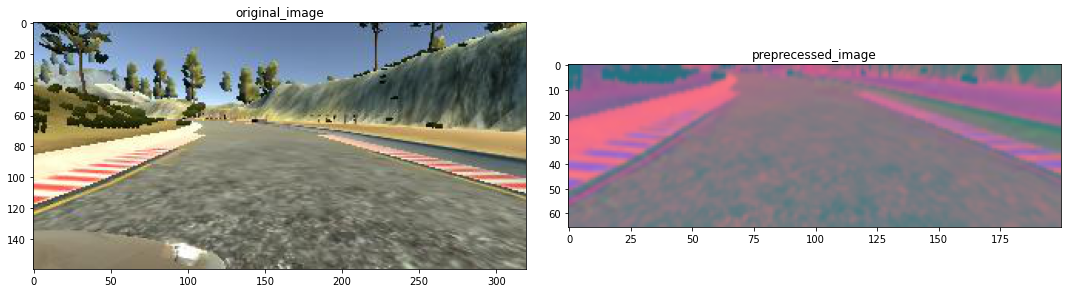

In [23]:
image =image_paths[110]
print(image.shape)
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original_image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('preprecessed_image')


In [0]:
    
    def batch_generator(image_paths, steering_ang, batch_size, istraining):
      
      while True:
        batch_img = []
        batch_steering = []
        
        for i in range(batch_size):
          random_index = random.randint(0, len(image_paths) - 1)
          
          if istraining:
            im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
         
          else:
            im = mpimg.imread(image_paths[random_index])
            steering = steering_ang[random_index]
          
          im = img_preprocess(im)
          batch_img.append(im)
          batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))  

Text(0.5, 1.0, 'Validation Generator Image')

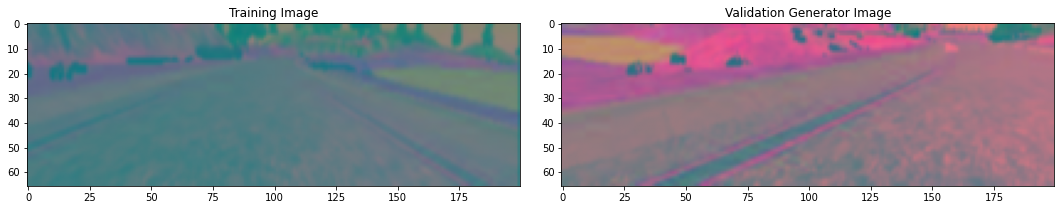

In [25]:
    x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
    x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_val, 1, 0))
     
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.tight_layout()
     
    axs[0].imshow(x_train_gen[0])
    axs[0].set_title('Training Image')
     
    axs[1].imshow(x_valid_gen[0])
    axs[1].set_title('Validation Generator Image')

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides =(2,2),input_shape=(66,200,3),activation='elu'))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation='elu'))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation='elu'))
  model.add(Convolution2D(64,(3,3),activation='elu'))
  model.add(Convolution2D(64,(3,3),activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100,activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(50,activation='elu'))
  # model.add(Dropout(0.5))
  model.add(Dense(10,activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(1))
  optimizer=Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [27]:
model = nvidia_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

In [0]:
history = model.fit_generator(batch_generator(X_train,y_train,100,istraining=1),
                              steps_per_epoch=300,
                              epochs=10,
                              validation_data=batch_generator(X_valid,y_val,100,0),
                              validation_steps =200,
                              verbose=1,
                              shuffle=1)

Epoch 1/10
300/300 [==============================] - 181s 603ms/step - loss: 0.0921 - val_loss: 0.0822
Epoch 2/10
300/300 [==============================] - 173s 576ms/step - loss: 0.0707 - val_loss: 0.0501
Epoch 3/10
300/300 [==============================] - 171s 569ms/step - loss: 0.0639 - val_loss: 0.0474
Epoch 4/10
300/300 [==============================] - 170s 565ms/step - loss: 0.0581 - val_loss: 0.0382
Epoch 5/10
300/300 [==============================] - 169s 562ms/step - loss: 0.0541 - val_loss: 0.0227
Epoch 6/10
300/300 [==============================] - 171s 571ms/step - loss: 0.0506 - val_loss: 0.0421
Epoch 7/10
299/300 [============================>.] - ETA: 0s - loss: 0.0479

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')